In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load dataset

In [3]:
cols = ['wife_age', 'wife_education', 'husband_education', 'num_children_born',
        'wife_religion', 'wife_working', 'husband_occupation',
        'standard_of_living_index', 'media_exposure', 'contraceptive_method_used']
cat_cols = ['wife_education', 'husband_education', 'husband_occupation', 'standard_of_living_index']
numerical_cols = ['media_exposure', 'wife_religion', 'num_children_born', 'wife_working', 'wife_age']

In [4]:
df = pd.read_csv('dataset2/data.csv', header=None, names=cols)
display(df.shape)
display(df.head())

(1473, 10)

,wife_age,wife_education,husband_education,num_children_born,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [5]:
df.contraceptive_method_used = df.contraceptive_method_used.replace(1, 0)
df.contraceptive_method_used = df.contraceptive_method_used.replace(2, 1)
df.contraceptive_method_used = df.contraceptive_method_used.replace(3, 1)

### Print statistics of dataset

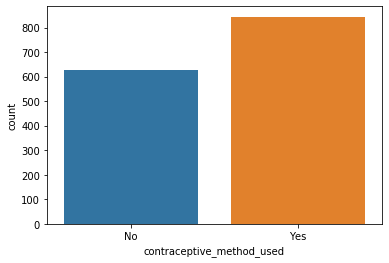

In [7]:
temp_label = df.contraceptive_method_used.copy()
temp_label[temp_label == 0] = 'No'
temp_label[temp_label == 1] = 'Yes'
sns.countplot(temp_label)

In [6]:
df.rename(columns={'contraceptive_method_used': 'label'}, inplace=True)
label = ['label']
features = list(set(df.columns) - set(label))
display(df.shape)
display(df.head())

(1473, 10)

,wife_age,wife_education,husband_education,num_children_born,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,label
0,24,2,3,3,1,1,2,3,0,0
1,45,1,3,10,1,1,3,4,0,0
2,43,2,3,7,1,1,3,4,0,0
3,42,3,2,9,1,1,3,3,0,0
4,36,3,3,8,1,1,3,2,0,0


In [7]:
X = df[features]
Y = df[label]

In [8]:
numerical_X = df[numerical_cols]
categorical_X = df[cat_cols]

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
onehot_arr = enc.fit_transform(categorical_X).toarray()
onehot_cols = list(enc.get_feature_names(cat_cols))
categorical_X = pd.DataFrame(onehot_arr, columns = onehot_cols)
display(categorical_X.shape)
display(categorical_X.head())

(1473, 16)

,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_of_living_index_1,standard_of_living_index_2,standard_of_living_index_3,standard_of_living_index_4
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
df = pd.concat([numerical_X, categorical_X, Y], axis=1)
display(df.shape)
display(df.head())

(1473, 22)

,media_exposure,wife_religion,num_children_born,wife_working,wife_age,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_of_living_index_1,standard_of_living_index_2,standard_of_living_index_3,standard_of_living_index_4,label
0,0,1,3,1,24,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0,1,10,1,45,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0,1,7,1,43,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0,1,9,1,42,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0,1,8,1,36,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [11]:
X, Y = df.drop('label', axis=1), df.label

In [12]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, Y)
for train_index, test_index in sss.split(X, Y):
    X_trainval, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_trainval, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    trainval_df = pd.concat([X_trainval, Y_trainval], axis=1)
    test_df = pd.concat([X_test, Y_test], axis=1)

In [13]:
trainval_df.to_csv('dataset2/processed_trainval_data.csv', index=False)
test_df.to_csv('dataset2/processed_test_data.csv', index=False)